In [64]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# Load transect densities from Soviet NP data

In [65]:
ef = pd.ExcelFile('../data/transect_densities.xlsx')

sns  = ef.sheet_names

dfs = []

for sn in sns:
    
    df = pd.read_excel('../data/transect_densities.xlsx',sheet_name=sn)
    
    dfs.append(df)

# Calculate mean density of each transect, and append to list along with day of year the transect was done on

In [66]:
mean_densities = []

for df in dfs:
    
#     print(df)
    
    for col in df.columns[1:]:
        
#         print(col)

        mean_densities.append( {'doy':col.timetuple().tm_yday,
                                    'den': np.nanmean(df[col])*1000,
                                    }
                                )

/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


# Turn into dataframe and visualise evolution of transect mean density

[]

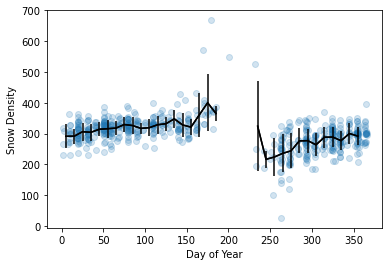

In [67]:
df = pd.DataFrame(mean_densities)

df.dropna(inplace=True)
    
bins = np.arange(0,361,10)

bcs = np.arange(5,361,10)
            
means, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='mean')
       
stds, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='std')

            
    
plt.scatter(df['doy'], df['den'],alpha=0.2)

plt.plot(bcs,means,color='k')
plt.errorbar(x=bcs,y=means,yerr=stds,color='k')

plt.ylabel('Snow Density')
plt.xlabel('Day of Year')

plt.plot()

# Make data continuous over 1st January, by shifting the discontinuity to 200th day of year

In [68]:
df['doy_adj'] = [-(365-d) if d>200 else d for d in df['doy']]

# Generate x-ticks and x-ticks label

In [69]:
month_start_doys = [0]
counter = 0
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for d in [31,28,31,30,31,30,31,31,31,31,30]:
    counter +=d
    month_start_doys.append(counter)

xticks = [-(365-d) if d>200 else d for d in month_start_doys]

# Plot the data over the winter season

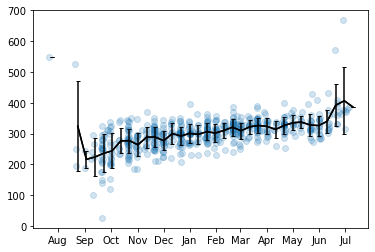

In [70]:
bins = np.arange(-165,201,10)            

means, bin_edges, bn = binned_statistic(df['doy_adj'],
                                            df['den'],
                                            bins=bins,
                                            statistic='mean')
       
stds, bin_edges, bn = binned_statistic(df['doy_adj'],
                                            df['den'],
                                            bins=bins,
                                            statistic='std')

            
    
plt.scatter(df['doy_adj'], df['den'],alpha=0.2)

plt.plot(bins[:-1]+5,means,color='k')
plt.errorbar(x=bins[:-1]+5,y=means,yerr=stds,color='k',capsize=2)

plt.xticks(xticks,labels=month_names)
plt.show()

# Fit a 1st order polynomial to the data.

Turns out that this is basically the same as fitting a 2 or 3rd order one! Line only curves when you get to 4th order.

[]

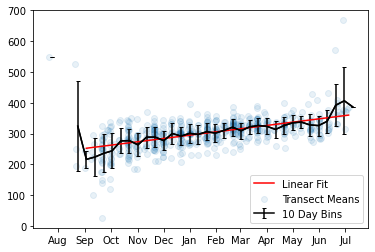

In [71]:
x = df['doy_adj']
y = df['den']
z = np.polyfit(x,y,1)

p = np.poly1d(z)

xs = np.arange(-120,190,5)

dens_plot = [den_from_doy(d) for d in xs]

plt.plot(xs,dens_plot,color='r',label='Linear Fit')

plt.scatter(x,y,alpha=0.1,label='Transect Means')


plt.plot(bins[:-1]+5,means,color='k')
plt.errorbar(x=bins[:-1]+5,y=means,yerr=stds,color='k',capsize=2,label='10 Day Bins')

plt.xticks(xticks,labels=month_names)
plt.legend()
plt.plot()

# And here's the formula that should be implemented in the complex model

In [63]:
def den_from_doy(doy):
    if doy>200:
        doy_adj = doy-365
    else:
        doy_adj = doy
        
    den = 294.45 + 0.353*doy_adj
    
    return den